In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

In [2]:
G = nx.Graph()
# G.add_node(1)
G.add_nodes_from(['a','b','c',1,2,3])
G.nodes()


# G.add_edge(1,2)
G.add_edges_from([(1,2),(1,3),(1,'a'),(1,'b'),(1,'c')])
G.edges()

#G.remove_edge(1,3)
#G.remove_edges_from([(1,2),(1,3)])
G.edges()

G.number_of_nodes()
G.number_of_edges()

5

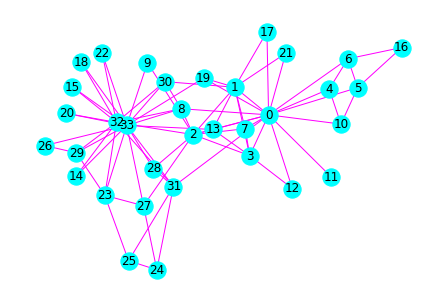

In [3]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True, node_color='cyan', edge_color='magenta')

In [4]:
# Both lines yield the same values
# G.degree(33)
# G.degree()[33]
# G.number_of_nodes(), G.number_of_edges()
G.degree(0) is G.degree()[0]

True

Erdos Renyi graph

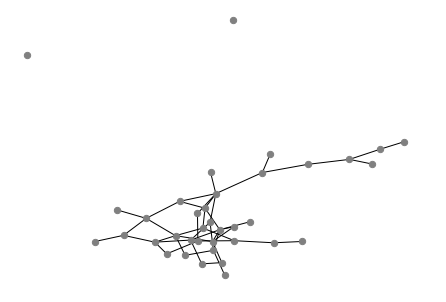

In [5]:
def er_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node_1 in G.nodes():    
        for node_2 in G.nodes():
            if node_1 < node_2 and bernoulli.rvs(p=p):
                G.add_edge(node_1,node_2)
    return G

nx.draw(er_graph(37,0.08), node_size = 40, node_color = 'gray')

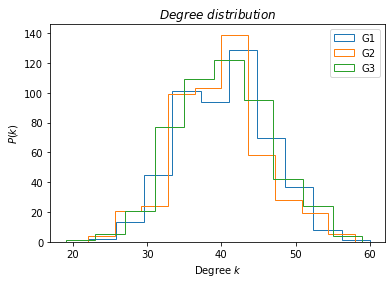

In [34]:
def plot_degree_dist(G,name):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype='step',label=name)
    plt.xlabel('Degree $k$')
    plt.ylabel('$P(k)$')
    plt.title('$Degree \ distribution$')
    plt.legend()

G1 = er_graph(500,0.08)
G2 = er_graph(500,0.08)
G3 = er_graph(500,0.08)
plot_degree_dist(G1,'G1')
plot_degree_dist(G2,'G2')
plot_degree_dist(G3,'G3')

    

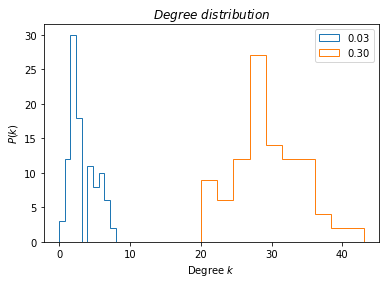

In [36]:
plot_degree_dist(nx.erdos_renyi_graph(100, 0.03),'0.03')
plot_degree_dist(nx.erdos_renyi_graph(100, 0.3),'0.30')

Descriptive stats of empirical social nets

In [9]:
A1 = np.loadtxt('data/vil-1.csv', delimiter=',')
A2 = np.loadtxt('data/vil-2.csv', delimiter=',')

In [39]:
# converting to net
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

# basic netw stats

def basic_net_stats(G):
    print("Number of nodes: %d" % G.number_of_nodes())
    print("Number of edges: %d" % G.number_of_edges())
    degree_seq = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_seq))

In [40]:
basic_net_stats(G1)
basic_net_stats(G2)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.08
Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


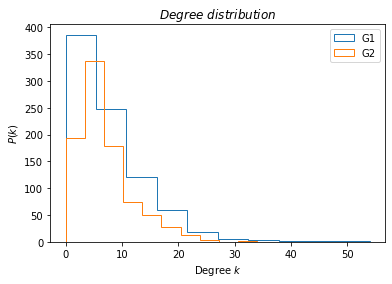

In [41]:
plot_degree_dist(G1,'G1')
plot_degree_dist(G2,'G2')

The last video should be updated with the following code:

In [53]:
G1_LCC = max([G1.subgraph(c).copy() for c in nx.connected_components(G1)],key=len)
G2_LCC = max([G2.subgraph(c).copy() for c in nx.connected_components(G2)],key=len)

In [66]:
G2_LCC.number_of_nodes() / G2.number_of_nodes()

0.9236031927023945

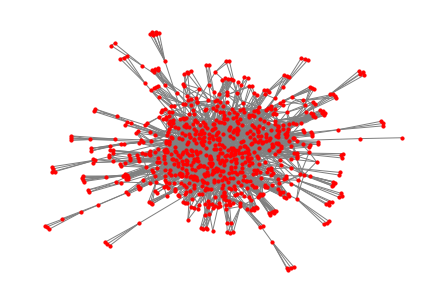

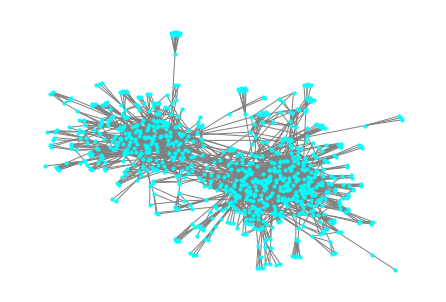

In [59]:
plt.figure()
nx.draw(G1_LCC, node_color='red',edge_color='gray',node_size=10)
plt.figure()
nx.draw(G2_LCC, node_color='cyan',edge_color='gray', node_size=10)